In [1]:
import numpy as np
import torch
import networkx as nx
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [ ]:
a = np.tile([1, 2, 3, 4], (4, 1))
a += np.arange(4).reshape(-1, 1)
for line in a:
	print(line)

In [ ]:
torch.unsqueeze(torch.tensor([1, 2, 4]), 1).shape

In [ ]:

hidden_channels= 5 * [6]
hidden_channels.append(7)
hidden_channels

In [ ]:
a = [1 for _ in range(1)]
a

In [ ]:
arr = np.array([1, 2, 4, 4])
print(np.sum([arr == np.max(arr)]))


In [ ]:
from algorithms import faulty_stochastic_opt

In [ ]:
ideal_labels = np.array([
	[1, 0, 0],
	[0, 1, 0],
	[0, 1, 0],
	[0, 0, 1],
])
faulty_stochastic_opt(ideal_labels, 0.5, np.random.default_rng(2))

In [ ]:
test = np.arange(6)
elems = [1, 2, 2, 4]
test[elems]

In [ ]:
from instance_generator import _sample_partitioned_graph

rng = np.random.default_rng(10)
p = 0.5
m = 8
n = 8
k = 4
eps = 0.1

kwargs = {'p': p, 'k': k, 'eps': eps}

adj = _sample_partitioned_graph(m, n, rng, **kwargs)
mat = np.zeros((m+n, m+n))
mat[:m, -n:] = adj
mat[-n:, :m] = adj.T

# Create a graph from the adjacency matrix
graph = nx.Graph(mat)

# Draw the graph
# pos = nx.spring_layout(graph)  # You can choose different layout algorithms
pos = nx.bipartite_layout(graph, np.arange(m))  # You can choose different layout algorithms
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray', alpha=0.7)
# plt.savefig(f"data/sparse_er_eps_{eps}.png")
plt.show()

In [ ]:
# visualize the FEAT graphs
from instance_generator import _sample_feature_bipartite_graph
from util import _symmetrize
rng = np.random.default_rng(10)
kwargs = {
	  'q': 0.9,
	  'ret_features': True
	}


adj, M, N = _sample_feature_bipartite_graph(m, n, rng, **kwargs)
print(np.sum(adj))
mat = _symmetrize(adj)
graph = nx.Graph(mat)

color_map = []
for node in graph:
    if node < m:
        color_map.append('skyblue')
    else: 
        color_map.append('tab:red') 

positions = np.vstack([M[:, :2], N[:, :2]])
pos = {node: positions[node] for node in range(m+n)}
fig, ax = plt.subplots(figsize=(10, 8))
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='gray', alpha=0.7, ax=ax)
limits=plt.axis('on') # turns on axis
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_title(f"q={kwargs['q']}")
# plt.hlines(y=0, xmin=-1, xmax=1, alpha=0.5, color='red', linestyles='--')
# plt.vlines(x=0, ymin=-1, ymax=1, alpha=0.5, color='red', linestyles='--')

# plt.savefig(f"data/FEAT_dot_prod_2d_no_rating.png")
plt.show()

In [ ]:
8 * 16 * 0.1

In [2]:
a = torch.tensor([1, 2, 1, 0, 0, 4, 4, 4, 4, 5])
c = torch.tensor([1, 5, 1, 0, 6, 4, 4, 4, 4, 12])

b = torch.tensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 2])

# Create a 2D mask where each row corresponds to the indices in b
mask = torch.arange(len(torch.unique(b))).unsqueeze(1) == b.unsqueeze(0)

# Use the mask to select elements from a and find the maximum along each row
result = torch.argmax(torch.where(mask, a.unsqueeze(0), float('-inf')), dim=1)
result2 = torch.argmax(torch.where(mask, c.unsqueeze(0), float('-inf')), dim=1)
acc = torch.sum(result == result2) / result.shape[0]
print(acc)
# print(result)

tensor(0.6667)


In [4]:
import torch
import numpy as np

import os
os.chdir('..')
from torch_geometric.loader import DataLoader
from gnn_library.util import train, save, load
from evaluate import evaluate_model, pp_output
import instance_generator as ig
import torch_converter as tc
import evaluate as ev
import osmnx as ox
from util import Dataset
from torch_scatter import scatter_max, scatter_add


scatter_max(a, b, dim=0)[0][b]

ModuleNotFoundError: No module named 'torch_scatter'

In [8]:
np.arange(len(np.unique(b)))[:, None] == b

array([[ True,  True,  True, False, False, False, False, False, False,
        False],
       [False, False, False,  True,  True,  True, False, False, False,
        False],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [24]:
a.shape[0]

10

In [16]:
import torch.nn as nn
criterion    = nn.BCELoss()
m = nn.Sigmoid()
prediction   = torch.tensor([[1.,0.,0.,1.,0.,0.],[0.,0.,0.,1.,0.,0.]])
prediction = torch.where(prediction > 0, prediction, float('-inf'))
prediction   = m(prediction)
print(prediction)
label        = torch.tensor([[0.,0.,0.,1.,0.,0.], [0.,0.,0.,1.,0.,0.]])
loss         = criterion(input=prediction,target=label)
print(loss.item())

tensor([[0.7311, 0.0000, 0.0000, 0.7311, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.7311, 0.0000, 0.0000]])
0.16164875030517578


[0.1        0.61578947 1.13157895 1.64736842 2.16315789 2.67894737
 3.19473684 3.71052632 4.22631579 4.74210526 5.25789474 5.77368421
 6.28947368 6.80526316 7.32105263 7.83684211 8.35263158 8.86842105
 9.38421053 9.9       ]
[ 0.3         1.84736842  3.39473684  4.94210526  6.48947368  8.03684211
  9.58421053 11.13157895 12.67894737 14.22631579 15.77368421 17.32105263
 18.86842105 20.41578947 21.96315789 23.51052632 25.05789474 26.60526316
 28.15263158 29.7       ]


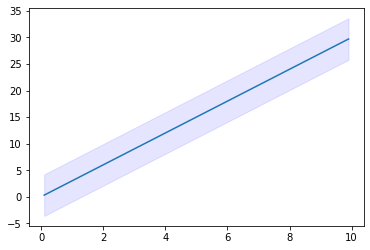

In [3]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
x = np.linspace(0.1, 9.9, 20)
y = 3.0 * x
print(x)
print(y)
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [20]:
import numpy as np 
import scipy.stats as st 
  
# define sample data 
gfg_data = np.array([np.random.randint(5, 10, 100), np.random.randint(1, 3, 100)]).T
print(np.mean(gfg_data, axis = 0).shape)
  
# create 90% confidence interval 
# for population mean weight 
a, b = st.norm.interval(alpha=0.90, 
                 loc=np.mean(gfg_data, axis = 0), 
                 scale=st.sem(gfg_data, axis = 0)) 

print(a)

(2,)
[6.98058251 1.48815704]


In [19]:
print(np.mean(gfg_data, axis = 0))

[7.02 1.51]
